In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

1.	Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [11]:
data = pd.read_csv('london.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [15]:
data.shape

(17414, 10)

In [21]:
data.timestamp = pd.to_datetime(data.timestamp)

In [23]:
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [25]:
data.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

2.	Постройте график по числу поездок по дате и времени.

Очень сложно разобрать данные, нужно преобразовать, чтобы увидеть тренды

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='cnt'>

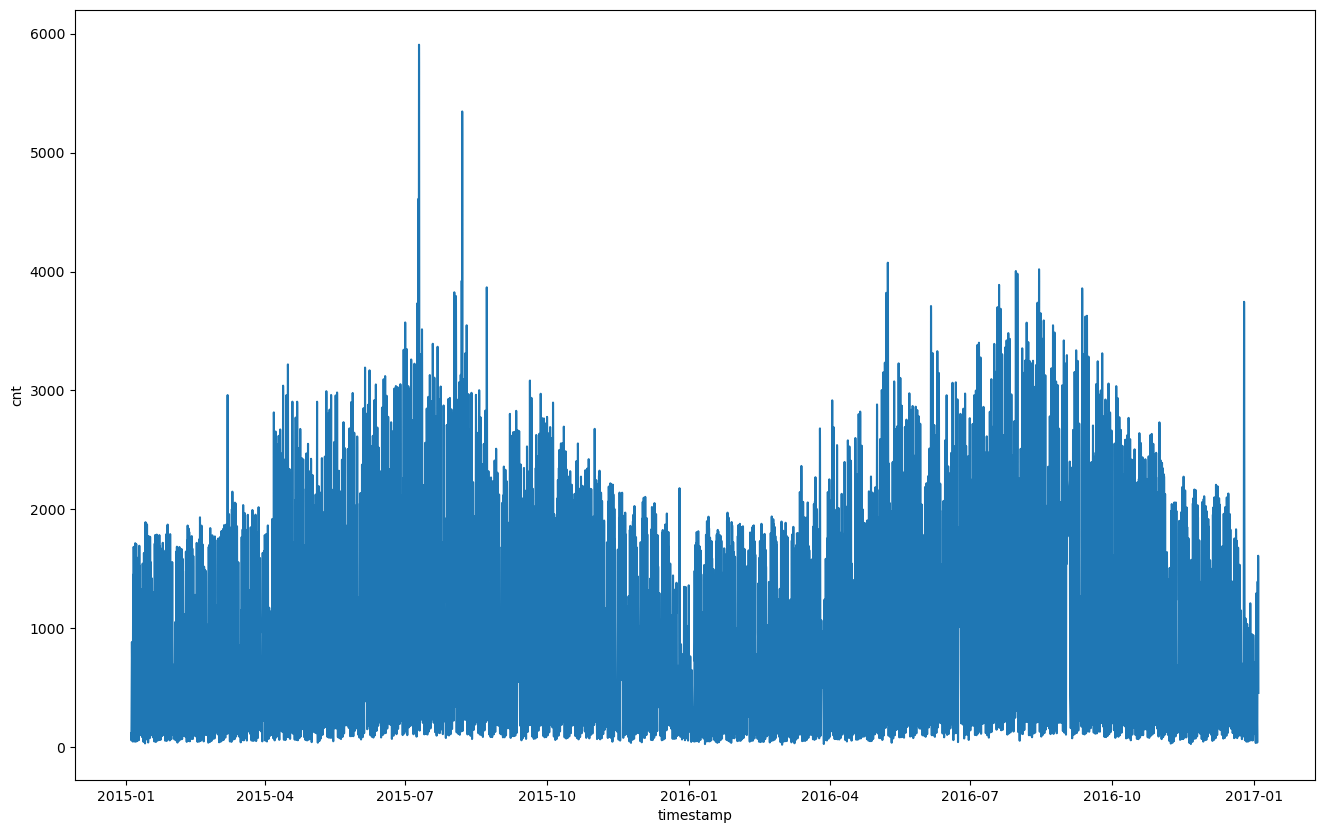

In [36]:
plt.figure(figsize=(16,10))
sns.lineplot(x = data.timestamp, y = data.cnt.rolling(5).mean())

3.	Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [75]:
data['date'] = data.timestamp.astype("string").str[0:10]

In [145]:
data.set_index('timestamp', drop = False, inplace = True)

<Axes: xlabel='timestamp'>

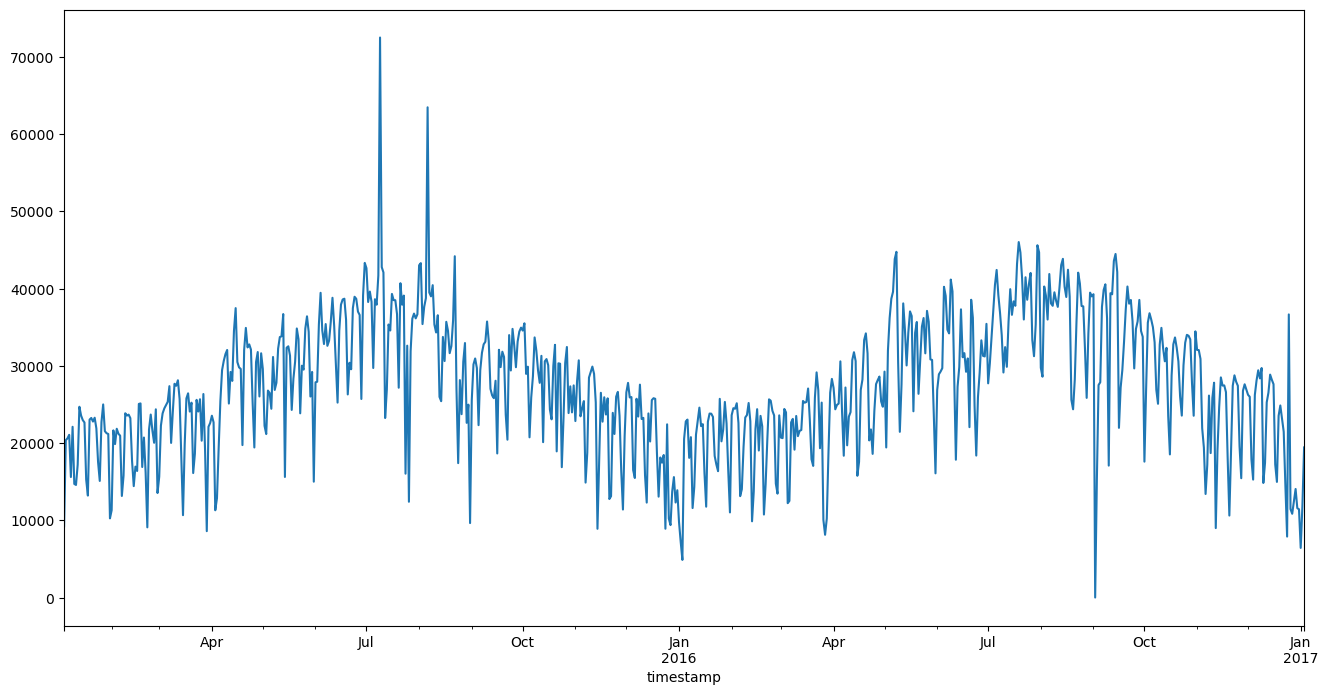

In [153]:
plt.figure(figsize=(16,8))
data.resample('D').cnt.sum().plot()

4.	Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [155]:
rolling_data = data.resample('D').cnt.sum().rolling(3).mean()
rolling_data.head()

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
Freq: D, Name: cnt, dtype: float64

<Axes: xlabel='timestamp'>

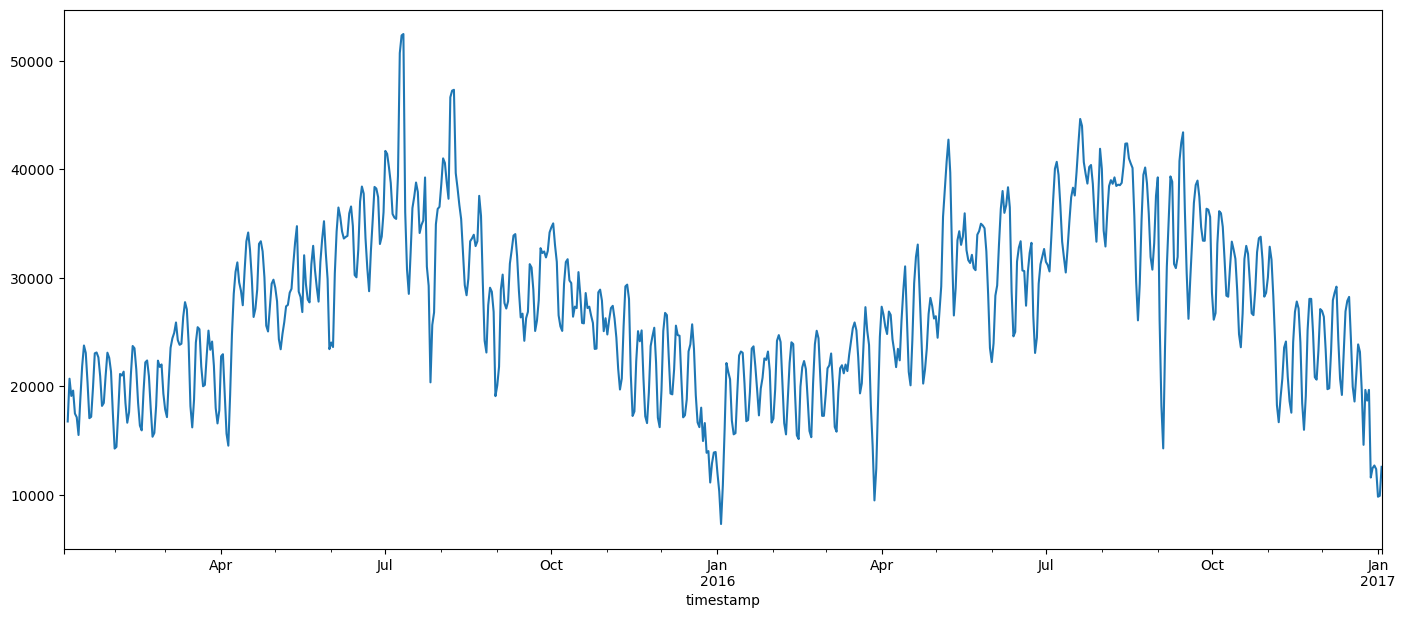

In [163]:
plt.figure(figsize=(17,7))
rolling_data.plot()

In [159]:
rolling_data.loc['2015-07-09']

50705.0

5.	Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [165]:
no_rolling_data = data.resample('D').cnt.sum()
no_rolling_data

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [167]:
no_rolling_data - rolling_data

timestamp
2015-01-04            NaN
2015-01-05            NaN
2015-01-06    3873.333333
2015-01-07     381.000000
2015-01-08   -3491.666667
                 ...     
2016-12-30   -1116.000000
2016-12-31    -923.333333
2017-01-01   -3382.666667
2017-01-02    1933.666667
2017-01-03    6876.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [175]:
std = np.std(no_rolling_data - rolling_data)
std

4558.586641117938

6.	Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.

In [216]:
rolling_data = rolling_data.reset_index()

In [218]:
lower_bound = rolling_data.cnt - 2.76*std
upper_bound = rolling_data.cnt + 2.76*std

In [220]:
lower_bound

0              NaN
1              NaN
2      4157.967537
3      8101.300871
4      6510.967537
          ...     
726     100.300871
727    -234.365796
728   -2778.032463
729   -2692.365796
730     -21.699129
Name: cnt, Length: 731, dtype: float64

In [222]:
upper_bound

0               NaN
1               NaN
2      29321.365796
3      33264.699129
4      31674.365796
           ...     
726    25263.699129
727    24929.032463
728    22385.365796
729    22471.032463
730    25141.699129
Name: cnt, Length: 731, dtype: float64

In [224]:
no_rolling_data = no_rolling_data.reset_index()

In [226]:
no_rolling_data['upper_bound'] = upper_bound
no_rolling_data['lower_bound'] = lower_bound

In [228]:
no_rolling_data.head()

,index,timestamp,cnt,upper_bound,lower_bound
0,0,2015-01-04,9234,NaN,NaN
1,1,2015-01-05,20372,NaN,NaN
2,2,2015-01-06,20613,29321.365796,4157.967537
3,3,2015-01-07,21064,33264.699129,8101.300871
4,4,2015-01-08,15601,31674.365796,6510.967537


7.	Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.

In [230]:
no_rolling_data.query('cnt > upper_bound').head()

,index,timestamp,cnt,upper_bound,lower_bound
186,186,2015-07-09,72504,63286.699129,38123.300871
214,214,2015-08-06,63468,59209.032463,34045.634204
609,609,2016-09-04,27512,26840.699129,1677.300871
721,721,2016-12-25,36653,32232.365796,7068.967537


In [232]:
no_rolling_data.iloc[no_rolling_data.cnt.idxmax()]

index                          186
timestamp      2015-07-09 00:00:00
cnt                          72504
upper_bound           63286.699129
lower_bound           38123.300871
Name: 186, dtype: object

8.	Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

In [234]:
no_rolling_data.query('cnt < lower_bound').head()

,index,timestamp,cnt,upper_bound,lower_bound
130,130,2015-05-14,15609,41291.032463,16127.634204
189,189,2015-07-12,23240,48618.365796,23454.967537
201,201,2015-07-24,16034,43595.365796,18431.967537
607,607,2016-09-02,0,38668.032463,13504.634204
615,615,2016-09-10,17080,43843.699129,18680.300871


In [236]:
no_rolling_data.iloc[no_rolling_data.cnt.idxmin()]

index                          607
timestamp      2016-09-02 00:00:00
cnt                              0
upper_bound           38668.032463
lower_bound           13504.634204
Name: 607, dtype: object